In [ ]:
#| default_exp brushes

In [ ]:
#| include: false
import sys; sys.path.insert(0, '..') # make sure rust binary can be found...

In [ ]:
#| exporti
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
#| export
def show_mask(brush):
    nx, ny = brush.shape
    _cmap = ListedColormap(colors={0: "#ffffff", 1: "#929292"}.values())
    ax = plt.gca()
    
    ax.set_yticks(jnp.arange(nx)+0.5)
    ax.set_yticklabels(["" for i in range(nx)])
    ax.set_xticks(jnp.arange(ny)+0.5)
    ax.set_xticklabels(["" for i in range(ny)])
    ax.set_yticks(jnp.arange(nx), minor=True)
    ax.set_yticklabels([f"{i}" for i in range(nx)], minor=True)
    ax.set_xticks(jnp.arange(ny), minor=True)
    ax.set_xticklabels([f"{i}" for i in range(ny)], minor=True)
    
    plt.grid(True, color="k")
    plt.imshow(brush, cmap=_cmap, vmin=0, vmax=1)
    plt.colorbar()

In [ ]:
#| export
def circular_brush(diameter):
    radius = diameter / 2
    X, Y = jnp.mgrid[-radius : radius : 1j * diameter, -radius : radius : 1j * diameter]
    _int = lambda x: jnp.array(x, dtype=int)
    brush = _int(X) ** 2 + _int(Y) ** 2 < radius ** 2
    return brush

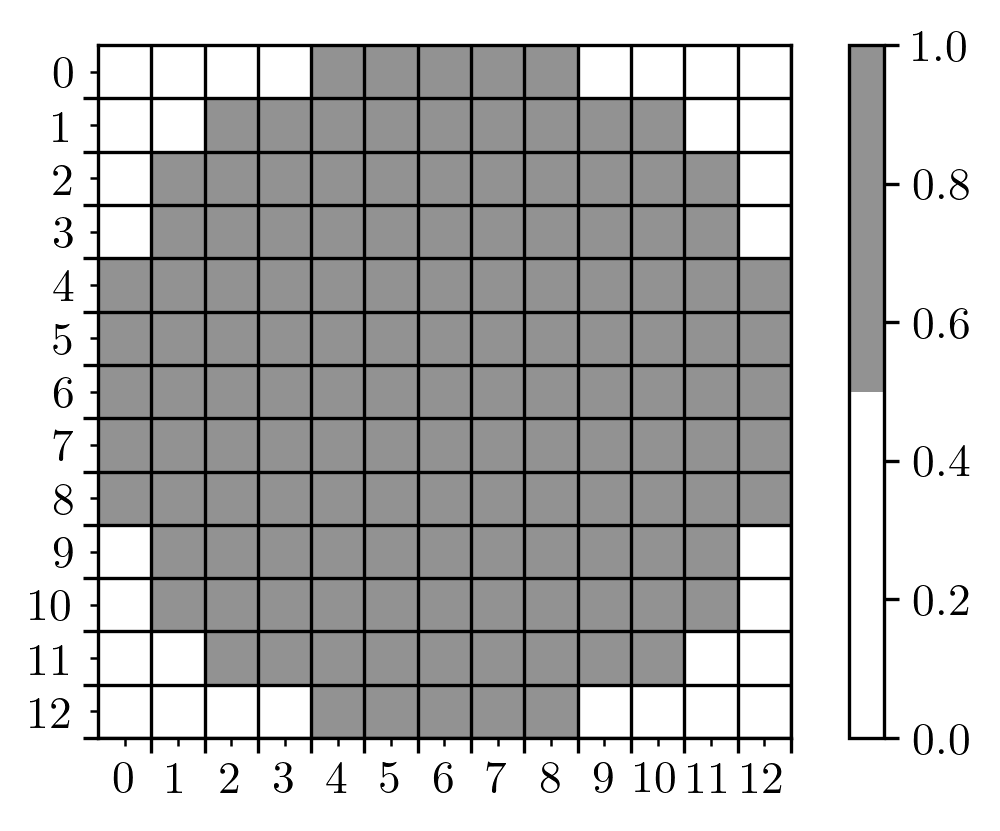

In [ ]:
show_mask(circular_brush(13))

In [ ]:
#| export
def notched_square_brush(width, notch):
    Z = jnp.ones((width, width), dtype=bool)
    notch = abs(notch)
    if notch > 0:
        Z = Z.at[:notch, :notch].set(False)
        Z = Z.at[:notch, -notch:].set(False)
        Z = Z.at[-notch:, :notch].set(False)
        Z = Z.at[-notch:, -notch:].set(False)
    return Z

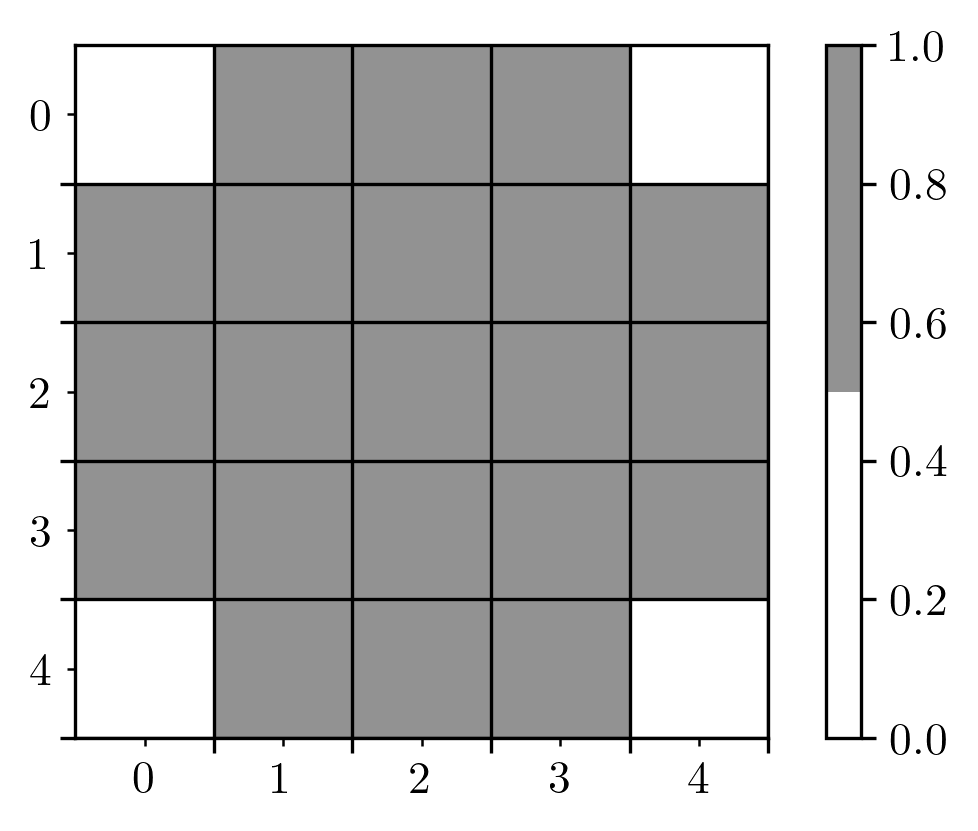

In [ ]:
show_mask(notched_square_brush(5, 1))